# Homework project for the "Differential Equations" course module

1. Solve the wave equation `dt^2 u(t,x) = dx^2 u(t,x)` numerically. Use a `1+1`-dimensional domain, and use Dirichlet boundary conditions `u(t,-L) = u(t,+L) = 0`. Use the spatial domain bounds `[-1; +1]`, and use the Gaussian-like function `f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2)` as initial condition. Use `L=1, A=1, W=0.2` as parameters. Evolve from `t=0` to `t=4L`, i.e. for two crossing times. Plot the result.

2. Vary the time step size `dt`. If you choose `dt` too large, the discrete system will be unstable. What is the stability limit? Why does this happen? How could you avoid this limit?

3. The energy density of a scalar wave is `epsilon(t,x) = 1/2 ((d/dt u(t,x))^2 + ((d/dx u(t,x))^2)`. Calculate the energy density as a function of space and time for your solution. Plot the result.

4. To calculate the total energy `E(t)` as a function of time, you need to integrate it over space. One way to do so is using the function below. Calculate and show the total energy `E(t)` as a function of time. How well is the energy conserved? How does this depend on the grid spacings `dx` and `dt?

In [1]:
# Integrate `epsilon` over space
function integrate(epsilon, n, dx)
    ni, nt = size(epsilon)
    # The boundary points are special; they have a weight of 1/2.
    # There are `ni` points overall, and the grid spacing is `dx = 2L/(ni-1)`.
    # Integrating the constant function `epsilon=1` thus gives exactly `2L`.
    E = epsilon[1, n] / 2
    for i in 2:ni-1
        E += epsilon[i, n]
    end
    E += epsilon[ni, n] / 2
    # Scale by the grid spacing
    E *= dx
    return E
end

integrate (generic function with 1 method)

In [2]:
function coords(nn, ni, L)
    dx = 2*L/ni
    dt = 4*L/nn
    t = [(n * dt) for i in 0:ni, n in 0:nn]
    x = [-L + i*dx  for i in 0:ni, n in 0:nn]
    return t, x
end

coords (generic function with 1 method)

In [26]:
L = 1
nn = 400
ni = 200
dx = 2*L/ni
dt = 4*L/nn
t, x = coords(nn, ni, L);

In [27]:
using Random

In [28]:
function standing(t, x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = cos(2π * t[i, n]) * cos(2π * x[i, n])
    end
    return u
end

function delta(t,x)
    ni, nn = size(t)
    u = zeros(ni, nn)
    set = rand(MersenneTwister(0), 1:ni-1, 15)
    # Initial conditions for first two points in time
    for n in 1:2, i in set
        
        u[i, n] = 5*cos(π/5 * i) #cos(2π * t[n, i]) * sin(2π * x[n, i])
    end
    
    return u
end

# f(t,x) = A exp(-1/2 sin(2pi (x-t))^2 / W^2)
# L=1, A=1, W=0.2
function GaussianLike(t,x)
    L=1 
    A=1 
    W=0.2
    
    ni, nn = size(t)
    u = zeros(ni, nn)
#     set = rand(MersenneTwister(0), 1:ni-1, 15)
    # Initial conditions for first two points in time
    for n in 1:2, i in 1:ni
        u[i, n] = A*exp((-1/2)*sin(2*π*(x[i,n]-t[i,n]))^2 / W^2)
        
    end
#     @show t
    return u
end

GaussianLike (generic function with 1 method)

In [29]:
# u = standing(t, x);
# u = delta(t,x);
u = GaussianLike(t, x);

In [30]:
using CairoMakie

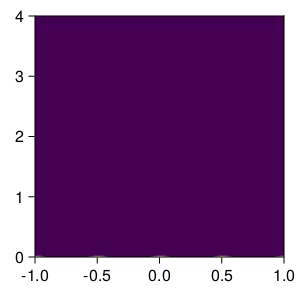

In [31]:
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
fig

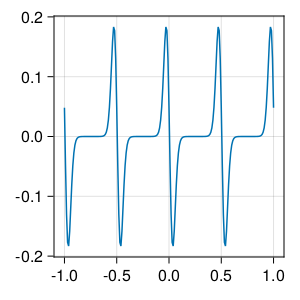

In [32]:
u[:,1]
fig = Figure(resolution = (300, 300))
ax = Axis(fig[1, 1])
lines!(x[:,1], u[:,1]-u[:,2])
fig

In [33]:
#find the solution at one interior point
function evolve_point!(u, dt, dx, n, i)
    ni, nn = size(u)
#     finite difference for second derivative in x direction
    uxx = (u[i-1,n-1] - 2*u[i,n-1] + u[i+1,n-1])/dx^2
#     time derivative
#     utt = (u[i,n-2] - 2*u[i,n-1] + u[i,n])/dt^2
#     solve for u[i,n]
#     utt = uxx
    u[i,n] = uxx * dt^2 - u[i,n-2] + 2*u[i,n-1]
    return
end

evolve_point! (generic function with 1 method)

In [36]:
# find the solution for one point in time
function evolve_step!(u, dt, dx, n)
    ni, nn = size(u)
    #dirischelet boundary conditon - set to 0
    u[1,n] = 0
    for i in 2:ni-1
        evolve_point!(u, dt, dx, n, i)
    end
    u[ni,n] = 0
    return
end

evolve_step! (generic function with 1 method)

In [37]:
# find the solution everywhere
function evolve!(u, dt, dx)
    ni, nn = size(u)
#     loop over all times
    for n in 3:nn
        evolve_step!(u, dt, dx, n)
    end
    return
end

evolve! (generic function with 1 method)

In [38]:
evolve!(u,dt,dx)

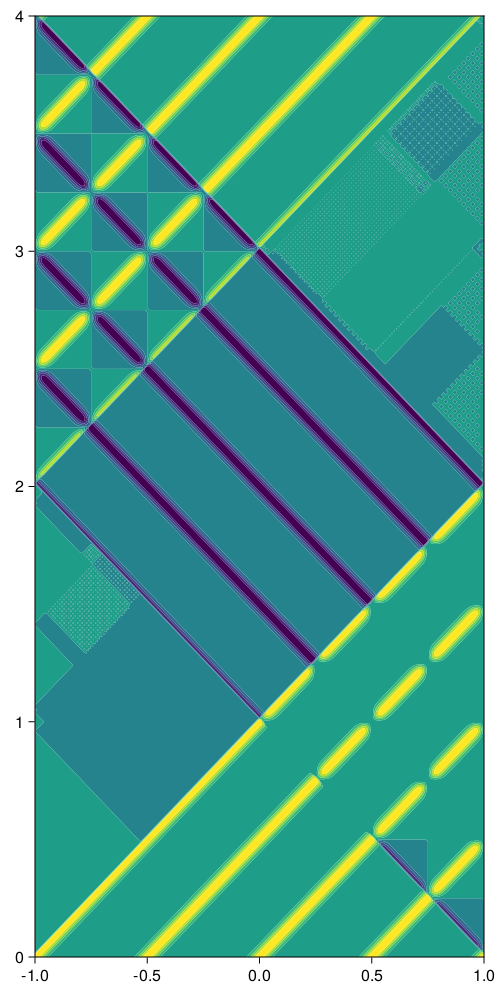

In [39]:
fig = Figure(resolution = (500, 1000))
ax = Axis(fig[1, 1])
contourf!(vec(x), vec(t), vec(u))
fig